# Visualize Trajectories

Quick utility to visualize argoverse csvs and symlinks to csvs.

In [27]:
import numpy as np
def traj_to_speeds_headings(traj, dt):
    """
    Given a sequence of n samples from a trajectory, compute arrays of speeds and headings for times t = 1 to t = n - 1
    Args:
        traj: the (n x 2) numpy array you get from the agent_traj property from ArgoverseForecastingLoader
        dt: time between samples
    """
    # Traj should be a n x 2 numpy array
    n_samples = traj.shape[0]
    assert traj.shape[1] == 2

    # Compute the offset vectors between positions from time step to time step.
    offset_vectors = np.diff(traj, axis = 0)

    # Compute the distance travelled using the offset vectors and divide by the sampling time to get speed.
    speeds = (1.0/dt) * np.linalg.norm(offset_vectors, axis = 1)

    # Use the dy and dxs from the offset vectors to compute the headings based off the formula:
    #   heading = arctan2(dy, dx)
    headings = np.arctan2(offset_vectors[:, 1], offset_vectors[:, 0])
    assert speeds.size == n_samples - 1
    assert headings.size == n_samples - 1
    return speeds, headings

def traj_to_accels_yawrates(traj, dt):
    """
    Given a sequence of n samples from a trajectory, compute arrays of accels and yawrates for times t = 1 to t = n - 2
    Args:
        traj: the (n x 2) numpy array you get from the agent_traj property from ArgoverseForecastingLoader
        dt: time between samples
    """
    n_samples = traj.shape[0]
    assert traj.shape[1] == 2
    speeds, headings = traj_to_speeds_headings(traj, dt)
    accels = (1.0/dt) * np.diff(speeds)
    yawrates = (1.0/dt) * np.diff(headings)
    print(np.abs(yawrates))
    assert accels.size == n_samples - 2
    assert yawrates.size == n_samples - 2
    return accels, yawrates

[0.0629467  0.53069994 0.14464789 0.66026094 0.54065496 0.13662359
 0.02123565 0.04688385 0.25337573 0.35721345 0.03052172 0.1006285
 0.23887109 0.48948844 0.08130419 1.21405935 0.81251902 0.7826873
 2.07537907 1.53424814 0.22986543 0.37679002 0.07706973 0.2057352
 0.58827125 0.35606137 0.25603997 0.20238645 0.30996133 0.01454932
 0.32676735 0.28906124 0.0695066  0.02444995 0.15296613 0.16865984
 0.11482957 0.10955082 0.2214104  0.32389706 0.02064539 0.03200701
 0.1351636  0.05338407 0.0560381  0.07681992 0.13510366 0.10340168]
[17.21191816  0.68763378  0.65833472 15.86594967 17.49109686  2.39741161
  1.88750319 16.98118844 17.29963741  0.17079277  0.47216912 16.65667552
 17.14569127  0.03594767  0.03346774  0.12979495  0.65206911  1.53567256
  1.60087205 17.73564486 16.77432034  0.94526648  0.59784576  2.12053207
  0.5320241   4.95839381  1.10147861  1.43119088  0.04710356  0.26796961
  0.10150411  0.26727914  0.23041721  2.6813373  30.77384006 22.72514063
  7.06049898  1.88482849  3.

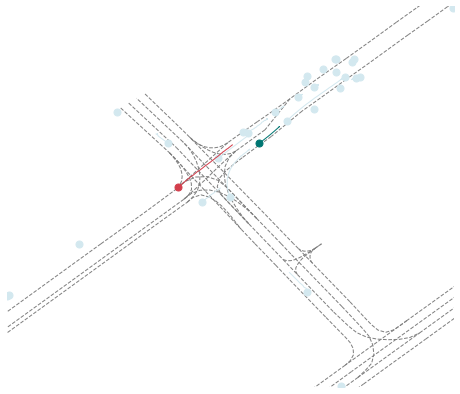

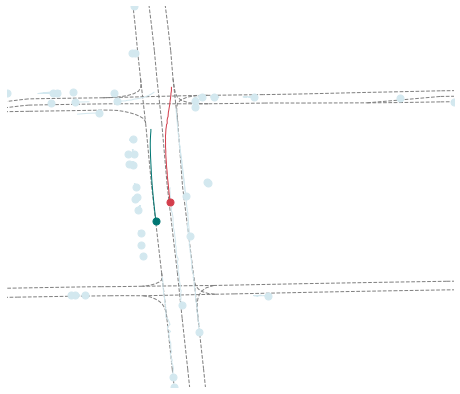

In [28]:
from argoverse.data_loading.argoverse_forecasting_loader import ArgoverseForecastingLoader
import getpass
from argoverse.visualization.visualize_sequences import viz_sequence
username = getpass.getuser()
import os

def visualize_traj(files, root_dir):
    """
    root_dir: directory the files are in
    files: list of strings indicating what files to visualizes (e.g: ["2645.csv", "3861.csv"])
    """
    root_dir = repo_root + data_dir
    afl = ArgoverseForecastingLoader(root_dir)
    for thing in afl:
        a, y = traj_to_accels_yawrates(thing.agent_traj, 0.1)
        print(a)
    for file in files:
        # The data files in argoverse_filtered are symlinks
        # so we need to use os.path.realpath
        seq_path = os.path.realpath(f"{root_dir}/" + file)
        viz_sequence(afl.get(seq_path).seq_df, show=True)

# Set the root directory of the repo.
repo_root = '/home/' + username + '/plan_verification_rss_2020'

# Set the directory our data is in and load the data in it.
data_dir = '/dataset/argoverse_raw/forecasting_sample/data'

# List of files we want to visualize in the data directory.
files = ["3700.csv", "3828.csv"]

visualize_traj(files, repo_root + data_dir)